### 0. _Import Dependency_
Melakukan _import dependency_ yang diperlukan merupakan langkah awal sebelum melakukan praktikum. Untuk memudahkan mencari _dependency_ apa saja yang telah di-_import_, operasi _import dependency_ dilakukan dalam sebuah _cell_.

#### A. _Install Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [3]:
pip install numpy scikit-image matplotlib scipy opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 49.5 MB 909 kB/s eta 0:00:01     |█████████████████▊              | 27.4 MB 131 kB/s eta 0:02:49     |████████████████████████████▏   | 43.6 MB 432 kB/s eta 0:00:14
Note: you may need to restart the kernel to use updated packages.


#### B. _Import Dependency_

In [10]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
from skimage.morphology import closing, disk, dilation, erosion, opening
from skimage.morphology import black_tophat, white_tophat
from scipy import fftpack as fp
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import sys

#### C. Unduh dan Ekstrasi Dokumen Pendukung

In [5]:
os.system('gdown https://drive.google.com/uc?id=17rCN9BzssahJ0JHa_EoOgCurPOYNI5_0')
os.system('unzip Lab\ 5\ -\ Images.zip')

256

### 1. Brief Introduction 

**_Feature Extraction_** adalah teknik-teknik yang dapat digunakan untuk mengekstraksi fitur daris ebuah citra. Fitur-fitur ini selanjutnya dapat diproses dan diolah, sebagai contoh untuk melakukan klasifikasi citra. Terdapat beberapa tipe fitur pada citra seperti _statistical feature_, _global feature_, dan _geometric features_.

### 2. _Statistical Feature_ 

#### 2.1. Image Histogram 

Kita dapat menggunakan piksel-piksel yang terdapat pada citra sebagai fitur. Untuk memudahkan bagaimana cara kita **melihat** bagaimana piksel-piksel dapat berfungsi sebagai fitur, kita dapat menggunakan historgram untuk meneliti bagaimana cara kita menggunakan fitur tersebut.

Misalkan kita ingin mngeklasifikasikan apakh citra _grayscale_ yang diberikan diambil pada malam hari atau siang hari. Kita bisa menampilkan terlebih dahulu histogram untuk citra siang dan malam.

In [6]:
basePath = 'Tutorial Lab 5 - Images/'
def getPath(fileName):
    return basePath + fileName

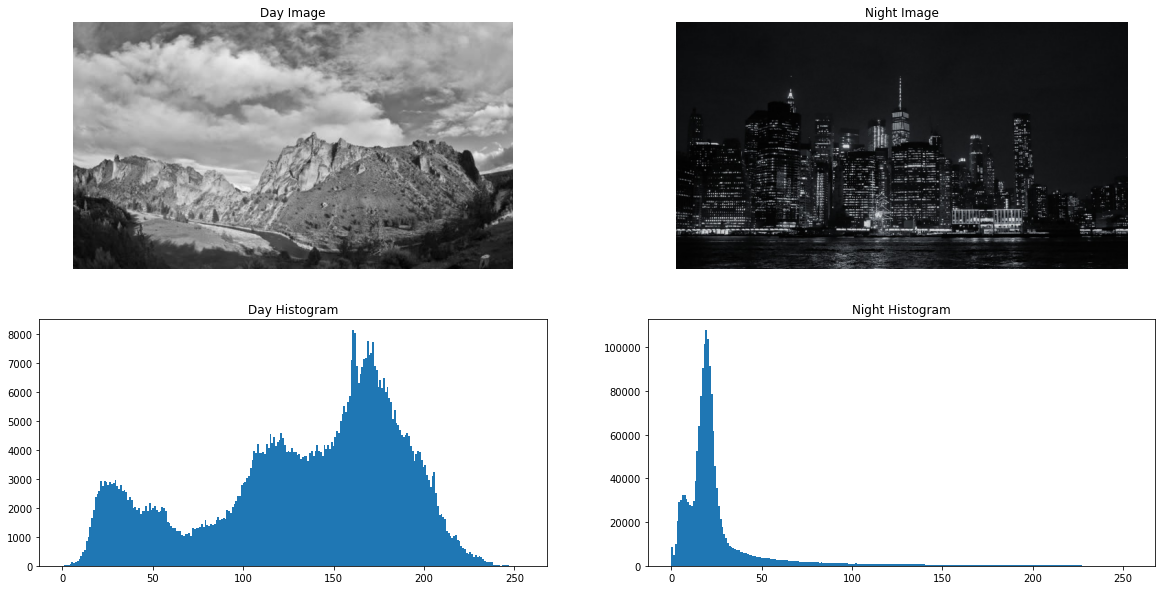

In [7]:
day = io.imread(getPath('day/day1.jpg'))
night = io.imread(getPath('night/night1.jpg'))

# Show image
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.title('Day Image')
plt.imshow(day)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Night Image')
plt.imshow(night)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Day Histogram')
plt.hist(day.flatten(), 256, range=(0,255))

plt.subplot(2, 2, 4)
plt.title('Night Histogram')
plt.hist(night.flatten(), 256, range=(0,255))

plt.show()

Dapat kita lihat dari hsil histogram yang ditampilkan di atas bahwa untuk citra pada siang hari memiliki distribusi yang cenderung ke kanan (intensitas lebih tinggi) dibanding citra pada malam hari yang distribusi histogram cenderung ke kiri (intensitas lebih rendah). Hal tersebut masuk akal karena pada umumnya siang hari lebih cerah dan tentu memiliki intensitas lebih tinggi.

Dari fitur ini kita bisa membuat sebuah model (tidak harus berbasis _machine learning_) untuk memprediksi apakah citra yang diberikan merupakan citra siang hari atau malam hari. Berikut adalah contoh cara untuk memprediksi apakah citra merupakan citra siang hari atau malam hari

In [11]:
def predict(file_location):
    img = io.imread(getPath(file_location))
    frequency_count = np.bincount(img.flatten())
    cum_sum = np.cumsum(frequency_count)
    
    ## Lebih banyak intensitas rendah, prediksi sebagai malam
    res = int(cum_sum[127] > cum_sum[-1] - cum_sum[127])
    return ['day', 'night'][res]


In [12]:
folders = ['day', 'night']
for folder in folders:
    for filename in os.listdir(getPath(folder)):
        filename = f'{folder}/{filename}'
        print(f'image {filename} predicted as {predict(filename)}')

image day/day3.jpg predicted as day
image day/day2.jpg predicted as day
image day/day1.jpg predicted as day
image night/night2.jpg predicted as night
image night/night1.jpg predicted as night
image night/night3.jpg predicted as night


Dapat dilihat bahwa hasil prediksi yang didapatkan memiliki akurasi $100\%$ hanya dengan menggunakan fitur simpel seperti histogram.

Contoh di atas adalah salah satu contoh yang menggunakan histogram pada citra _grayscale_. Tetapi penggunaan **Image Histogram** ini tidka hanya berfokus pada histogram _grayscale_. Terdapat banyak variasi lain yang dapat digunakan seperti menggunakan histogram RGB maupun menggunakan histogram HSI.

#### 2.2. Image Segmentation 

Dengan melakukan segmentasi terlebih dahulu pada citra. Maka kita bisa mendapatkan fitur-fitur berupa banyak objek, bentuk objek yang relevan, dan masih banyak lagi. Cara untuk melakukan segmentasi akan dibahas pada lab selanjutnya.

### 3. Global Feature

#### 3.1. Fourier Transform 

Seperti yang telah dipelajari pada lab sebelumnya, kita dapat menggunakan frekuensi hasil fourier transform untuk dijadikan sebagai fitur. Teknik ini tidka akan dibahs lebih lanjut pada lab kali ini karena telah dibahas pada lab sebelumnya.

#### 3.2. Hough Transformation 

Hough Transformation adalah algoritma yang dapat mendeteksi bentuk-bentuk pada citra selama bentuk tersebut dapat direpresentasikan dalam garis lurus. Untuk melakukan Hough Transformation, kita harus mencari terlebih dahulu _edge-edge_ pada citra tersebut. Hal ini bisa dicapai dengan menggunakan **Algoritma Canny** (akan dibahas lebih lanjut pada lab selanjutnya)

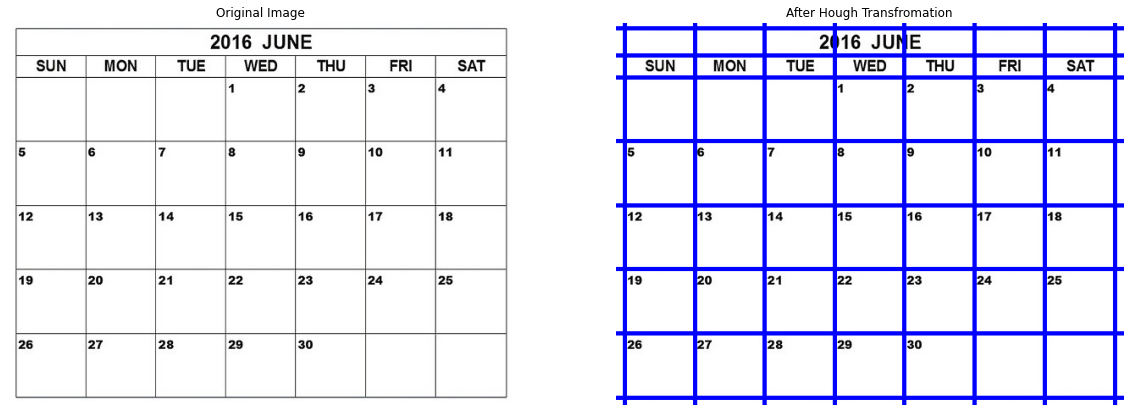

In [25]:
img = io.imread(getPath('calendar.jpg'))
original_image = np.copy(img)

## Convert image to gray
gray = util.img_as_ubyte(color.rgb2gray(img))

## Find all of the edges using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

## Find all of the lines using Hough Transformation
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

## Plotting line
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 500 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 500 * a)
        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

## Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('After Hough Transfromation')
plt.imshow(img)
plt.axis('off')
plt.show()

Hasil dari **Hough Transformation** dengan _library_ OpenCV di atas adalah daftar garis atau _edge_ yang dideteksi dari citra. Dengan informasi ini, kita dapat mengekstrak nilai-nilai fitur sesuai kebutuhan, misal jumlah garis/_edge_, bentuk _edge_, manipulasi aritmetika dari _edge_ (misal hitung luas, walau ini lebih mudah dengan segmentasi _region_), dan lainnya. Pemilihan nilai yang diekstrak bergantung pada karakteristik yang dibutuhkan dan _task_ yang dikerjakan (misal klasifikasi citra) dan perlu dicoba secara empiris.

### 4. Geometrical Feature 

Mengekstrak bentuk geometris dari sebuah citra

#### 4.1. Image Morphology 

_Mathemacial morphology_ dapat digunakan juga untuk melakukan ekstraksi fitur dari sebuah gampar. _Image morphology_ dapat dilakukan dengan dilatasi, erosi, dan lain-lain seperti yang telah dibahas pada lab 3 sebelumnya.

#### 4.2 Template Matching 

_Template Matching_ adalah metode untuk mencari dan menemukan bagian kecil dari sebuah citra sesuai dengan template yang diinginkan. Template tersebut akan berperan sebagai jendela yang akan digeser sepanjang citra (konvolusi) dan mencocokkkan _template_ tersebut dengan bagian citra yang tercover oleh template.

Berikut contoh _template matching_ untuk bagian obor dari citra monas.

In [ ]:
## Import citra yang dibutuhkan
citra_monas = cv2.cvtColor(cv2.imread(getPath('monas.jpg')), cv2.COLOR_BGR2RGB)
template_obor = cv2.cvtColor(cv2.imread(getPath('obor-monas.jpg')), cv2.COLOR_BGR2RGB)

## Ubah menjadi gray
citra_monas_gray = cv2.cvtColor(citra_monas, cv2.COLOR_RGB2GRAY)
template_obot_gray = cv2.cvtColor(template_obot, cv2.COLOR_RGB2GRAY)

## Menyimpan width dan height template
w, h = template_obor_gray.shape[::-1]

## Apply template matching
## Parameter ketiga merupakan method, bisa melihat dokumentasi openCV untuk penjelasan lebih lanjut dan pilihan method lainnya
res = cv2.matchTemplate(citra_monas_gray, template_obor_gray, cv2.TM_CCOEFF_NORMED)

## Tentukan threshold
threshold = 0.9
loc = np.where(res >= threshold)

## Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_poing, end_point, color, thickness)
for point in zip(*loc[::-1]):
    cv2.rectangle(template_matched, point, (point[0] + w, point[1] + h), (0,0,255), 2)

## Menampilkan citra
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(citra_monas)
plt.title('Citra Monas'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(template_obor)
plt.title('Template Obor'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(template_matched)
plt.title('Template Matched'), plt.xticks([]), p;